In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X_train_data = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/finaldata/train_test_data/X_train.csv')
Y_train_data = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/finaldata/train_test_data/Y_train.csv')
X_test_data = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/finaldata/train_test_data/X_test.csv')
Y_test_data = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/finaldata/train_test_data/Y_test.csv')

In [6]:
X_train0 = X_train_data.drop('0', axis=1)
X_trainRNN = X_train0.drop('1', axis=1)
X_test0 = X_test_data.drop('0', axis=1)
X_testRNN = X_test0.drop('1', axis=1)

In [7]:
Y_train = Y_train_data.drop('Unnamed: 0', axis=1)
Y_test = Y_test_data

In [8]:
x_trainRNN = X_trainRNN.values
x_testRNN = X_testRNN.values
y_train = Y_train.values
y_test = Y_test.values

In [9]:
x_trainRNN = np.reshape(x_trainRNN, (x_trainRNN.shape[0], 1, x_trainRNN.shape[1]))
x_testRNN = np.reshape(x_testRNN, (x_testRNN.shape[0], 1, x_testRNN.shape[1]))

In [10]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding, LSTM, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
#x_element_MAX_Dimention = 2169+22
#N=10 #2169+22要壓到幾維?
K=10 #LSTM的個數

In [12]:
modelRNN = Sequential()

In [13]:
#model.add(Embedding(x_element_MAX_Dimention,N)) 
modelRNN.add(LSTM(K,input_dim=31))
modelRNN.add(Dense(1))
modelRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelRNN.summary()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, input_shape=(None, 31))`
  


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,691.0
Trainable params: 1,691
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
modelRNN.fit(x_trainRNN, y_train, batch_size=1000, epochs=2)

Epoch 1/2
13147844/13147844 [==============================] - 158s - loss: 7.3879 - acc: 0.8572   
Epoch 2/2
13147844/13147844 [==============================] - 86s - loss: 6.8659 - acc: 0.8567    


In [15]:
score = modelRNN.evaluate(x_testRNN, y_test)
print("loss:", score[0])
print("正確率:", score[1])

847840/848248 [============================>.] - ETA: 0sloss: 18.56060263566784
正確率: 0.9031556808857787


In [16]:
y_train_predict = modelRNN.predict(x_trainRNN)
y_test_predict = modelRNN.predict(x_testRNN)

In [17]:
y_test_predict

array([[0.1135323],
       [0.1135323],
       [0.1135323],
       ...,
       [0.1135323],
       [0.1135323],
       [0.1135323]], dtype=float32)

In [18]:
y_test_predict[12]

array([0.1135323], dtype=float32)

In [19]:
X_trainNN = X_train_data.iloc[:,0:2]
X_trainNN['y_train_predict'] = y_train_predict
X_testNN = X_test_data.iloc[:,0:2]
X_testNN['y_test_predict'] = y_test_predict

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
x_trainNN = X_trainNN.values
x_testNN = X_testNN.values

In [21]:
modelNN = Sequential()
modelNN.add(Dense(50, input_dim=3))
#modelNN.add(Activation('sigmoid'))
modelNN.add(Dense(5))
#modelNN.add(Activation('sigmoid'))
modelNN.add(Dense(1))
#modelNN.add(Activation('softmax'))
modelNN.compile(loss='mse', optimizer=Adam(lr=0.03), metrics=['accuracy'])
modelNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 461.0
Trainable params: 461
Non-trainable params: 0.0
_________________________________________________________________


In [22]:
modelNN.fit(x_trainNN, y_train, batch_size=1000, epochs=2)

Epoch 1/2
13147844/13147844 [==============================] - 33s - loss: 10230.0396 - acc: 0.5229    
Epoch 2/2
13147844/13147844 [==============================] - 30s - loss: 5155.0301 - acc: 0.7664    


In [23]:
score = modelNN.evaluate(x_testNN, y_test)
print('loss:', score[0])
print('正確率:', score[1])

847072/848248 [============================>.] - ETA: 0sloss: 18.400926829783963
正確率: 0.8371172110041883


In [64]:
y_predict = modelNN.predict(x_testNN)

In [65]:
y_predict

array([[0.07315771],
       [0.08302011],
       [0.09189965],
       ...,
       [0.42168802],
       [0.46975988],
       [0.47014707]], dtype=float32)

In [68]:
y_predict[245]
y_predict = np.array(y_predict)

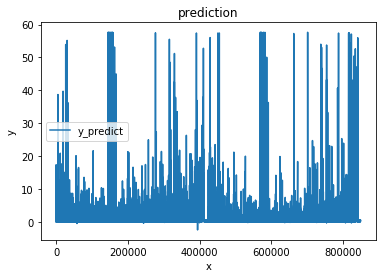

In [79]:
plt.title('prediction')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(y_predict)
plt.legend(["y_predict"],loc = "best")
plt.show()

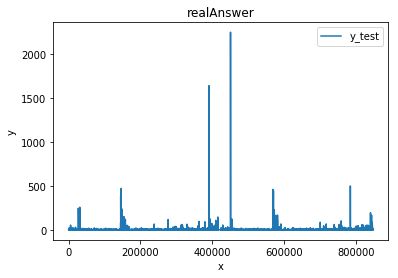

In [76]:
plt.title('realAnswer')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(y_test)
plt.legend(["y_test"],loc = "best")
plt.show()

In [24]:
X_test_data_real = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/finaldata/train_test_data/X_test_real.csv')

In [26]:
#讀取kaggle中欲預測的資料集
kaggle_test = pd.read_csv('C:/Users/User/Desktop/107_2/py/My Python Lab/final_data/test.csv')

In [27]:
kaggle_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [28]:
X_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2,991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2920,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_test_data_real.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2,991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1472,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1905,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2920,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_test_data_real0 = X_test_data_real.drop('0', axis=1)
X_test_data_realRNN = X_test_data_real0.drop('1', axis=1)

In [31]:
X_test_data_realRNN = X_test_data_realRNN.values

In [32]:
X_test_data_realRNN = np.reshape(X_test_data_realRNN, (X_test_data_realRNN.shape[0], 1, X_test_data_realRNN.shape[1]))

In [33]:
X_test_data_realRNN

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1]]], dtype=int64)

In [34]:
y_test_data_real_predict = modelRNN.predict(X_test_data_realRNN)

In [35]:
y_test_data_real_predict

array([[0.1135323],
       [0.1135323],
       [0.1135323],
       ...,
       [0.9145689],
       [0.9145689],
       [0.9145689]], dtype=float32)

In [36]:
X_test_data_realNN = X_test_data_real.iloc[:,0:2]
X_test_data_realNN['y_test_data_real_predict'] = y_test_data_real_predict

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
X_test_data_realNN = X_test_data_realNN.values

In [38]:
kaggle_predict = modelNN.predict(X_test_data_realNN)

In [39]:
# 最終預測出來的值
kaggle_predict

array([[0.07315771],
       [0.08302011],
       [0.09189965],
       ...,
       [1.4210591 ],
       [1.46912   ],
       [1.4695163 ]], dtype=float32)

In [40]:
# 把預測值合併 shop_id 和 item_id
All_result = pd.DataFrame(X_test_data_real.iloc[:,0:2])

In [41]:
All_result['predict'] = kaggle_predict

In [42]:
All_result.columns = ['shop_id', 'item_id','predict']

In [43]:
All_result.head()

,shop_id,item_id,predict
0,2,991,0.073158
1,2,1472,0.083020
2,2,1905,0.091900
3,2,2920,0.112715
4,2,3320,0.120915


In [44]:
len(All_result)

424124

In [45]:
len(kaggle_test)

214200

In [46]:
### 找尋在kaggle_test的資料中有沒有沒有出現過的商店_商品組合

In [47]:
All_result_test = pd.DataFrame(X_test_data_real.iloc[:,0:2])

In [48]:
All_result_test.columns = ['shop_id', 'item_id']

In [49]:
#result = pd.merge(kaggle_test, All_result, on=['shop_id','item_id'])

In [50]:
kaggle_testNotFind = All_result_test[~(All_result_test['shop_id'].isin(kaggle_test['shop_id']) & All_result_test['item_id'].isin(kaggle_test['item_id']))].reset_index(drop=True)

In [51]:
kaggle_testNotFind = kaggle_test[~(kaggle_test['shop_id'].isin(All_result_test['shop_id']) & kaggle_test['item_id'].isin(All_result_test['item_id']))].reset_index(drop=True)

In [52]:
kaggle_testNotFind

,ID,shop_id,item_id
0,1,5,5320
1,4,5,5268
2,45,5,5826
3,64,5,3538
4,65,5,3571
5,70,5,3604
6,74,5,3407
7,75,5,3408
8,77,5,3405
9,109,5,3984


In [53]:
#找出真正x_test裡要預測的所有商店_商品組合，跟預測值合併成為 result
result = pd.merge(All_result, kaggle_test,how='right', on=['shop_id','item_id'])

In [54]:
result = result.sort_values(by=['ID'])

In [55]:
#從未出現在x_train中的商店_商品組合的預測銷售量假設為零
result = result.fillna(0)

In [56]:
#將預測銷售量的值四捨五入到整數
result['predict'] = round(result['predict'], 0)

In [57]:
result

,shop_id,item_id,predict,ID
56026,5,5037,0.0,0
111404,5,5320,0.0,1
87191,5,5233,1.0,2
100217,5,5232,0.0,3
111405,5,5268,0.0,4
55190,5,5039,1.0,5
103085,5,5041,1.0,6
65416,5,5046,0.0,7
64744,5,5319,0.0,8
111406,5,5003,0.0,9


In [58]:
final_result = {'ID':result['ID'], 'item_cnt_month':result['predict']}

In [59]:
final_result = pd.DataFrame(final_result)

In [60]:
final_result.head()

,ID,item_cnt_month
56026,0,0.0
111404,1,0.0
87191,2,1.0
100217,3,0.0
111405,4,0.0


In [62]:
#儲存檔案為繳交至kaggle的結果
final_result.to_csv('C:/Users/User/Desktop/submission.csv', index=0)